In [1]:
# Common imports
import numpy as np
import os
import pandas as pd
import tarfile
from six.moves import urllib
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
housing = pd.read_csv('./datasets/housing/housing.csv')

In [3]:
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f84f65828>,
      dtype=object)

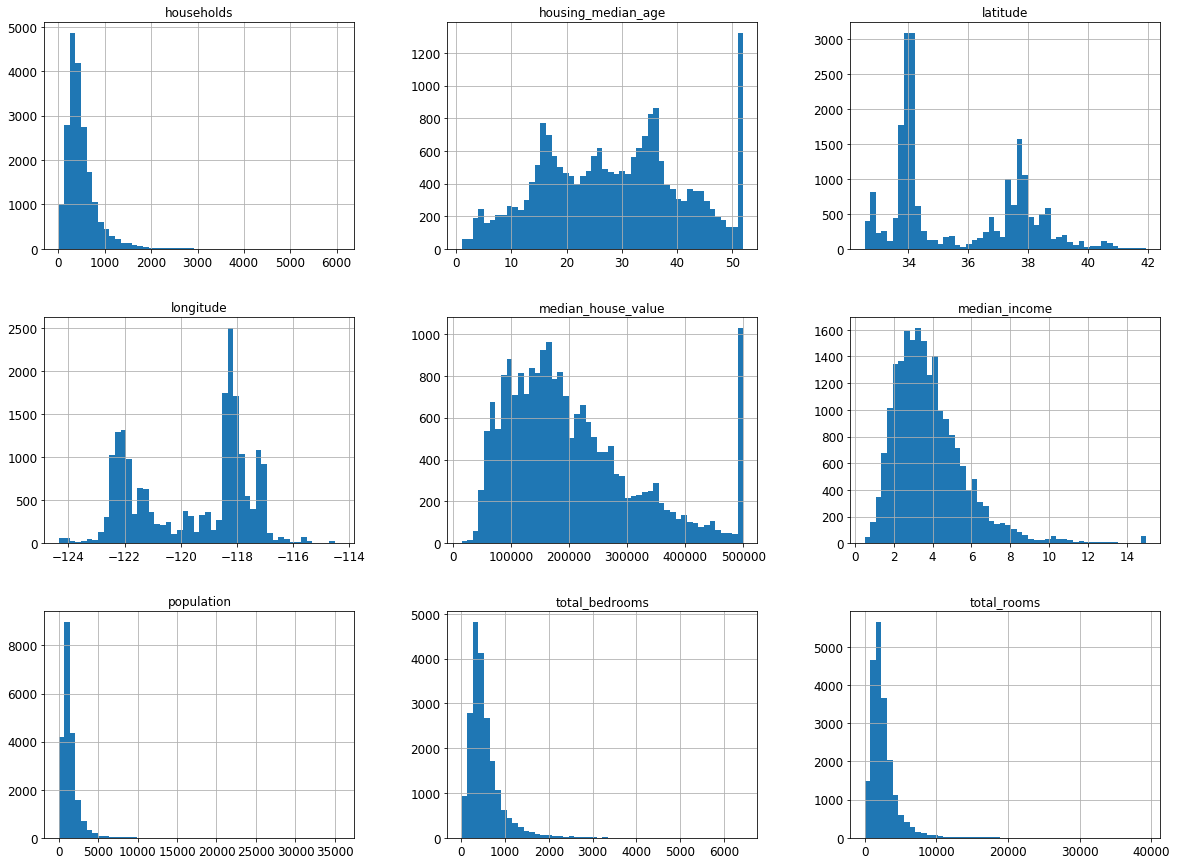

In [6]:
housing.hist(bins=50, figsize=(20,15))

(array([2247., 7436., 6098., 2990., 1060.,  428.,  178.,   93.,   47.,
          63.]),
 array([ 0.4999 ,  1.94992,  3.39994,  4.84996,  6.29998,  7.75   ,
         9.20002, 10.65004, 12.10006, 13.55008, 15.0001 ]),
 <a list of 10 Patch objects>)

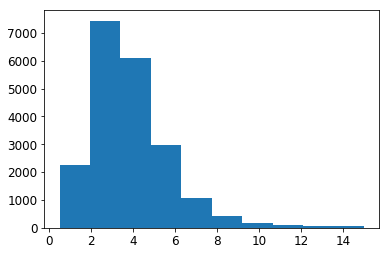

In [7]:
plt.hist(housing.median_income)

In [8]:
housing.median_income.value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
3.8750     41
3.0000     38
3.3750     38
3.6250     37
4.0000     37
4.3750     35
2.1250     33
2.3750     32
4.6250     31
3.5000     30
3.2500     29
3.7500     29
4.8750     29
1.6250     29
2.2500     29
4.2500     28
2.5000     28
3.6875     26
2.7500     25
4.5000     24
2.5625     21
1.8750     21
5.0000     20
3.0625     19
4.4375     18
           ..
5.7780      1
1.3672      1
4.6420      1
2.5389      1
6.2113      1
2.1975      1
6.0591      1
2.1403      1
1.5161      1
4.0037      1
1.9306      1
4.0517      1
3.5082      1
5.2649      1
6.7744      1
4.0677      1
2.1216      1
4.1449      1
6.0808      1
5.6263      1
4.8283      1
2.5599      1
7.3031      1
2.7209      1
2.1630      1
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64

In [9]:
housing['income_cat'] = np.ceil(housing.median_income/1.5)
housing.income_cat.value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [10]:
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)
housing.income_cat.value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [11]:
housing.income_cat.value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

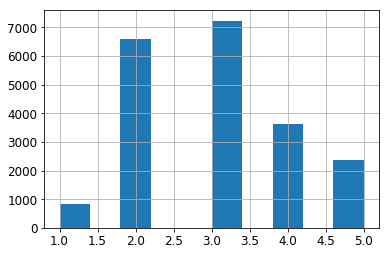

In [12]:
housing.income_cat.hist()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_train_set.income_cat.value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [15]:
strat_test_set.income_cat.value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [16]:
for i in (strat_train_set, strat_test_set):
    i.drop('income_cat', axis=1, inplace=True)

In [17]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [18]:
housing = strat_train_set.copy()

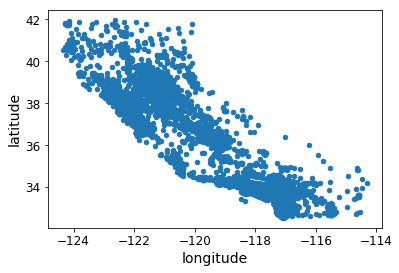

In [19]:
housing.plot(kind='scatter', x='longitude', y='latitude')

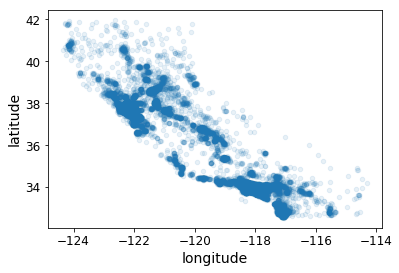

In [20]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

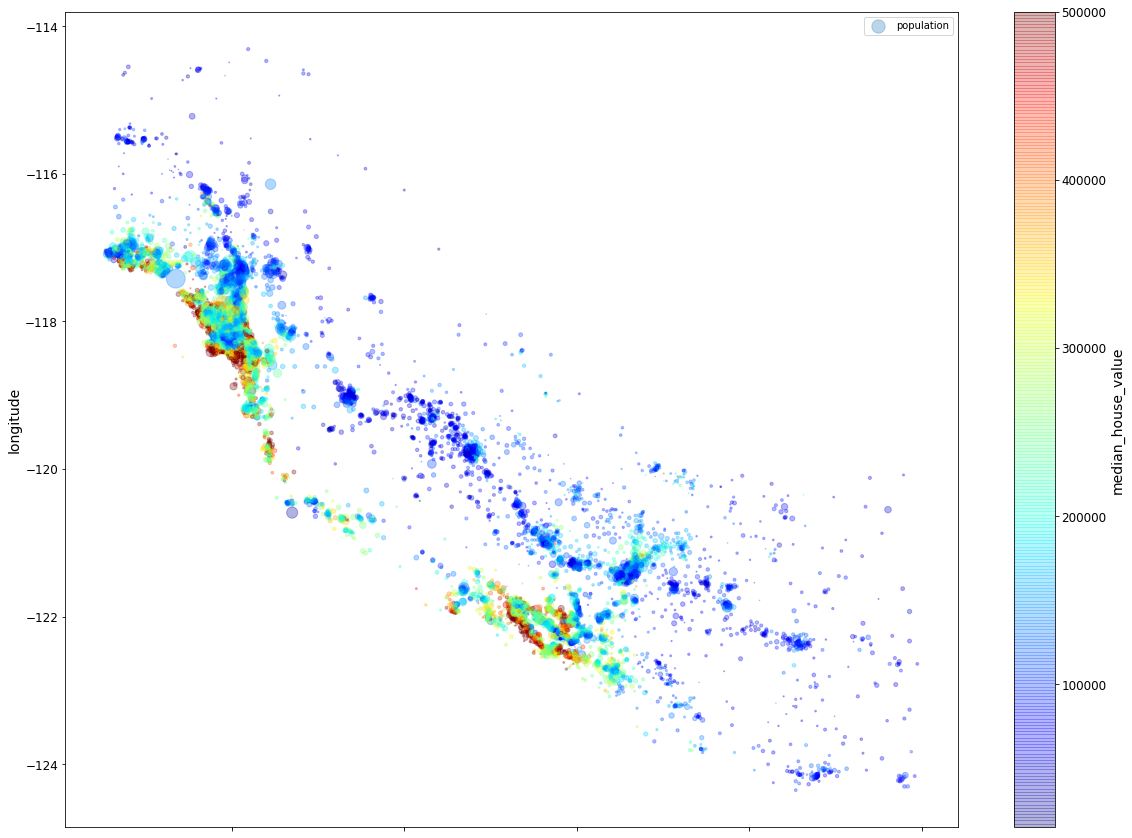

In [21]:
housing.plot(kind='scatter', x='latitude', y='longitude', alpha=0.3,
            s=housing['population']/100, label='population', figsize=(20, 15),
            c='median_house_value', cmap=plt.get_cmap("jet"), colorbar=True)

In [22]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f4acd2240>,
      dtype=object)

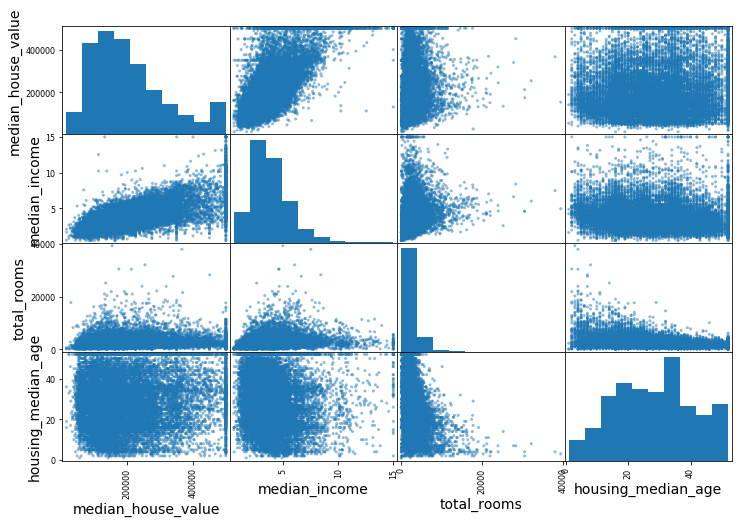

In [23]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

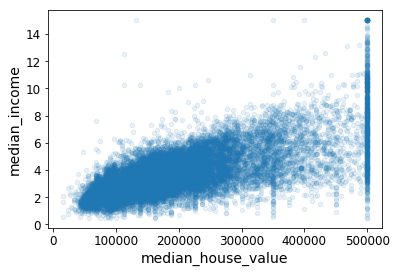

In [24]:
housing.plot(kind='scatter', x='median_house_value', y='median_income', alpha=0.1)

In [25]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [26]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [27]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [28]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [29]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


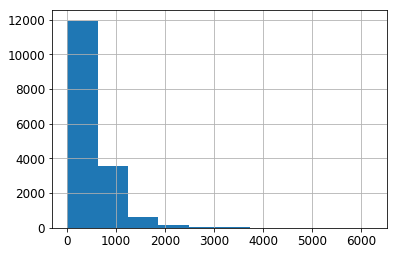

In [31]:
housing.total_bedrooms.hist()

In [32]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')

housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

/home/sagarnil/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [33]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [34]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [35]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


In [36]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [37]:
housing.ocean_proximity.value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [38]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing['ocean_proximity'])
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [39]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [40]:
room_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")
]

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, room_ix]/X[:, household_ix]
        population_per_household = X[:, population_ix]/X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, room_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else: 
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [46]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, 
                                     columns=list(housing.columns) + ['rooms_per_household', 'population_per_household'])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                    ('imputer', Imputer(strategy='median')),
                    ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=False)),
                    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

/home/sagarnil/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [49]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.61493744,
        -0.31205452, -0.08649871],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  1.33645936,
         0.21768338, -0.03353391],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.5320456 ,
        -0.46531516, -0.09240499],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ..., -0.3167053 ,
         0.3469342 , -0.03055414],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.09812139,
         0.02499488,  0.06150916],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.15779865,
        -0.22852947, -0.09586294]])

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
            ("num", num_pipeline, num_attribs),
            ("cat", OneHotEncoder(), cat_attribs)
            
])

housing_prepared = full_pipeline.fit_transform(housing)

/home/sagarnil/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [55]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [56]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
some_data =housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

#lin_reg.predict(some_data)
some_data_prepared = full_pipeline.transform(some_data)
lin_reg.predict(some_data_prepared)

array([211888.26540421, 321274.25149998, 210853.46010112,  62261.10820843,
       194921.76527689])

In [59]:
some_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [60]:
from sklearn.metrics import mean_squared_error

housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68911.7605423384

In [63]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [64]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [65]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                        scoring='neg_mean_squared_error', cv=10)

tree_rmse_score = np.sqrt(-scores)

In [66]:
tree_rmse_score

array([70529.90590632, 69637.7049731 , 69783.40744308, 70325.44340067,
       71514.07221445, 73558.74652102, 72000.80513156, 69724.16153872,
       76778.97892421, 68242.31499554])

In [70]:
def display_scores(score):
    print("Score:", score)
    print("mean:", score.mean())
    print("std:", score.std())
    
display_scores(tree_rmse_score)

Score: [70529.90590632 69637.7049731  69783.40744308 70325.44340067
 71514.07221445 73558.74652102 72000.80513156 69724.16153872
 76778.97892421 68242.31499554]
mean: 71209.5541048669
std: 2324.114534725853


In [71]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [72]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21979.735682642353

In [73]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                        scoring='neg_mean_squared_error', cv=10)
forest_rmse = np.sqrt(-forest_scores)
forest_rmse

array([51229.65964557, 49107.56965836, 53564.59833428, 55327.3159345 ,
       49896.78065833, 56009.32100639, 51171.48995202, 50117.7606741 ,
       54880.65970247, 52651.27052852])

In [74]:
display_scores(forest_rmse)

Score: [51229.65964557 49107.56965836 53564.59833428 55327.3159345
 49896.78065833 56009.32100639 51171.48995202 50117.7606741
 54880.65970247 52651.27052852]
mean: 52395.64260945326
std: 2331.5883000253293


In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]}
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                          scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [76]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [77]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [78]:
cvres = grid_search.cv_results_

cvres

{'mean_fit_time': array([0.0495647 , 0.14875808, 0.44547429, 0.07469606, 0.24888959,
        0.74998193, 0.10962186, 0.36010962, 1.06731143, 0.13671284,
        0.45984063, 1.37213764, 0.07333951, 0.24159408, 0.09296899,
        0.32321877, 0.12467909, 0.41495051]),
 'std_fit_time': array([0.00676417, 0.00164716, 0.00345336, 0.00121045, 0.00348485,
        0.0121142 , 0.0010985 , 0.00196366, 0.01069633, 0.00047723,
        0.00304803, 0.00537967, 0.00070614, 0.00189432, 0.00137881,
        0.00314711, 0.00145834, 0.00581074]),
 'mean_score_time': array([0.00288763, 0.00762625, 0.02176313, 0.00289083, 0.00761232,
        0.02209973, 0.00278206, 0.00794501, 0.02208643, 0.00323205,
        0.00817075, 0.022541  , 0.00314546, 0.008849  , 0.00308609,
        0.00912075, 0.00317564, 0.00871625]),
 'std_score_time': array([1.49979697e-04, 1.39274772e-04, 4.52259103e-04, 4.89614713e-04,
        9.47080226e-05, 8.30574777e-04, 1.02259660e-04, 2.71637744e-04,
        1.63996451e-04, 8.43590962e-

In [79]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

65024.51539138425 {'max_features': 2, 'n_estimators': 3}
55369.59025280072 {'max_features': 2, 'n_estimators': 10}
52731.735440246615 {'max_features': 2, 'n_estimators': 30}
58623.418894088274 {'max_features': 4, 'n_estimators': 3}
52378.36191042763 {'max_features': 4, 'n_estimators': 10}
49915.76620688712 {'max_features': 4, 'n_estimators': 30}
58073.424903368264 {'max_features': 6, 'n_estimators': 3}
51649.59506981811 {'max_features': 6, 'n_estimators': 10}
49646.425080604444 {'max_features': 6, 'n_estimators': 30}
57471.94298088951 {'max_features': 8, 'n_estimators': 3}
51544.07914766144 {'max_features': 8, 'n_estimators': 10}
49785.31086064365 {'max_features': 8, 'n_estimators': 30}
62702.070198734764 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54548.265596936246 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60336.33562364444 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51884.07849492392 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [80]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.049565,0.006764,0.002888,0.000150,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.213076e+09,-4.326567e+09,...,-4.228188e+09,1.555188e+08,18,-1.179138e+09,-1.153108e+09,-1.090899e+09,-1.124356e+09,-1.150783e+09,-1.139657e+09,2.991642e+07
1,0.148758,0.001647,0.007626,0.000139,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.934780e+09,-3.197654e+09,...,-3.065792e+09,1.058115e+08,11,-5.784546e+08,-5.819307e+08,-5.537310e+08,-5.811761e+08,-5.674866e+08,-5.725558e+08,1.074301e+07
2,0.445474,0.003453,0.021763,0.000452,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.563679e+09,-2.926035e+09,...,-2.780636e+09,1.474927e+08,9,-4.377405e+08,-4.260882e+08,-4.214714e+08,-4.401489e+08,-4.255473e+08,-4.301993e+08,7.356394e+06
3,0.074696,0.001210,0.002891,0.000490,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.250705e+09,-3.516381e+09,...,-3.436705e+09,1.186065e+08,15,-9.400841e+08,-9.294620e+08,-9.128206e+08,-9.866596e+08,-9.266876e+08,-9.391428e+08,2.529998e+07
4,0.248890,0.003485,0.007612,0.000095,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.445434e+09,-2.900465e+09,...,-2.743493e+09,1.758100e+08,8,-4.934495e+08,-5.061416e+08,-5.005304e+08,-5.372917e+08,-5.120577e+08,-5.098942e+08,1.501662e+07
5,0.749982,0.012114,0.022100,0.000831,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.271841e+09,-2.601212e+09,...,-2.491584e+09,1.416741e+08,3,-3.839376e+08,-3.803028e+08,-3.732428e+08,-3.926347e+08,-3.839668e+08,-3.828170e+08,6.276186e+06
6,0.109622,0.001099,0.002782,0.000102,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.118585e+09,-3.425787e+09,...,-3.372523e+09,1.612785e+08,14,-8.623625e+08,-8.871349e+08,-8.954233e+08,-8.696166e+08,-8.979139e+08,-8.824903e+08,1.412503e+07
7,0.360110,0.001964,0.007945,0.000272,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.488960e+09,-2.720107e+09,...,-2.667681e+09,1.307887e+08,6,-4.863637e+08,-4.890131e+08,-4.976668e+08,-5.025810e+08,-4.819742e+08,-4.915198e+08,7.538211e+06
8,1.067311,0.010696,0.022086,0.000164,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.288970e+09,-2.512921e+09,...,-2.464768e+09,1.380798e+08,1,-3.747125e+08,-3.765566e+08,-3.768241e+08,-3.803121e+08,-3.712783e+08,-3.759367e+08,2.950101e+06
9,0.136713,0.000477,0.003232,0.000844,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.104598e+09,-3.357682e+09,...,-3.303024e+09,1.033682e+08,12,-8.629217e+08,-8.523493e+08,-8.426132e+08,-9.130922e+08,-8.622785e+08,-8.666510e+08,2.438098e+07


In [81]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([9.32506141e-02, 8.23530271e-02, 4.22097448e-02, 2.06186888e-02,
       1.83236013e-02, 1.88947217e-02, 1.74590214e-02, 3.50053899e-01,
       8.44059062e-02, 1.08317395e-01, 1.78159193e-02, 1.33113861e-01,
       6.03044512e-05, 6.10568685e-03, 7.01760938e-03])

In [82]:
extra_attribs = ['rooms_per_household', 'population_per_household', 'bedrooms_per_room']


In [88]:
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [89]:
attributes = num_attribs + extra_attribs + cat_attribs
sorted(zip(feature_importances, attributes))

[(0.017459021430683327, 'households'),
 (0.01781591930103145, 'bedrooms_per_room'),
 (0.018323601320081026, 'total_bedrooms'),
 (0.0188947216779291, 'population'),
 (0.020618688819341743, 'total_rooms'),
 (0.042209744808093135, 'housing_median_age'),
 (0.08235302705669943, 'latitude'),
 (0.08440590616587995, 'rooms_per_household'),
 (0.0932506140539984, 'longitude'),
 (0.10831739469174168, 'population_per_household'),
 (0.13311386051304586, 'ocean_proximity'),
 (0.35005389947890464, 'median_income')]

In [90]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

46893.67972481771